In [1]:
import numpy as np
from matplotlib import pylab as plt
import scipy as sp
from scipy import signal as sgn
import scipy.signal.signaltools as sigtool
from scipy.signal import hilbert, chirp
%matplotlib inline
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [2]:
Fp = 1000000
Fm1 = 1000
Fm2 = 1500
Mult = 80 #a cuantas Fp muestreo
Fs = Mult*Fp
tiempo = 0.006
t = np.linspace(0,tiempo,tiempo*Fs)
t.shape
f = np.linspace(0,Fs,t.shape[0])

In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [4]:
t.shape


(480000,)

In [13]:
Vs = 10
m = 0.25
vs = Vs*(1+m*(np.cos(2*np.pi*Fm1*t)+np.cos(2*np.pi*Fm2*t)))*np.cos(2*np.pi*Fp*t)

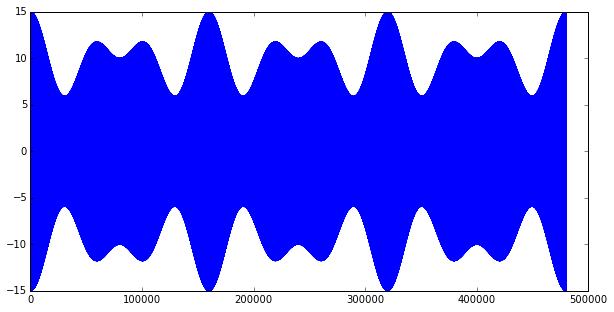

In [14]:
plt.plot(vs)

In [24]:
Qc = 10.
Vdsmin = 10.
Vdd = 100.
Vcc = 0.
Ids = 2./3 * vs
Ids = np.array([i if i>0 else 0 for i in Ids])

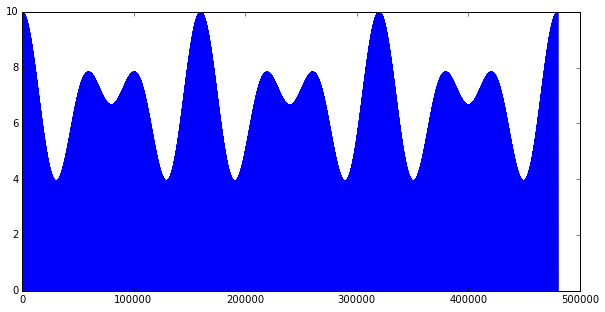

In [25]:
plt.plot(Ids)

In [26]:
Ids.max()

10.0

In [27]:
file = open("salida.txt",'w')
#fileq = open("salidaq.dat",'w')
for j,i in enumerate(Ids):
    file.write(str(np.float(j)/Fs)+ " "+str(i)+"\n")
 #   fileq.write(str(j/Fs)+ " ; "+str(i)+"\n")
    #print(str(j/Fs)+ " "+str(i))
file.close()
#fileq.close()

In [36]:
Id2 = 20/3/np.pi

In [42]:
Rc = (Vdd-Vdsmin)/Id2
Rc

42.4115008234622

In [38]:
L = Rc/(2*np.pi*2*Fp*Qc)
L

3.3749999999999995e-07

In [41]:
C = Qc/(Rc*2*np.pi*Fp*2)
C

1.8763182155988485e-08

In [40]:
(Ids.cumsum()/Ids.shape)[-1]

2.1220783394257166

In [45]:
open("")

array([  1.00000000e+01,   1.99950656e+01,   2.99753328e+01, ...,
        -9.99506559e+00,  -9.15152398e-10,   1.00000000e+01])

# Condición de portadora:

In [46]:
Id2_port = 40/9/np.pi

In [47]:
Id2_port

1.4147106052612919

In [48]:
Vd2_port = Id2_port*Rc
Pc = Vd2_port**2/2/Rc

In [49]:
Pc

42.441318157838744

In [50]:
Vd2_port

59.999999999999986

# PEP
Potencia que disiparía si la señal de salida estaría al máximo siempre

In [51]:
PEP = (Vdd-Vdsmin)**2/Rc

In [52]:
PEP

190.98593171027446

In [61]:
Id1 = 10/3 #Ipico sobre 2

In [62]:
Vd1 = Id1*Rc*1/np.sqrt(1+Qc**2*(3/2)**2)

In [63]:
Vd1

9.4039035653497631

In [64]:
P1 = Vd1**2/2/Rc

Potencia en la frecuencia de portadora de la señal modulante:

In [65]:
P1

1.0425639337134269

Potencia en continua: depende de la modulación, pero suponemos, como todo es lineal y es clase B que la potencia disipada en el dispositivo es:

In [66]:
Id0 = 20/3/np.pi

In [67]:
Pcc = Vdd * Id0
Pcc

212.20659078919383

In [69]:
Pdisip = Pcc-Ps

NameError: name 'Ps' is not defined

Si ahora se cambia Qc = 100 y las frecuencias modulantes a 10K y 15K-> calcular el ma

In [ ]:
At1970 = 1/